#### Importing the required Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

#### Importing the dataset from the stored location

In [2]:
mart = pd.read_csv('/content/drive/MyDrive/Walmart Project/Walmart DataSet.csv')

# Displaying 10 records from the dataset randomly
mart.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5814,41,25-11-2011,1906713.35,1,36.37,3.424,195.770400,6.759
5963,42,06-01-2012,636372.37,0,59.85,3.443,130.157516,7.545
1499,11,03-06-2011,1343637.00,0,86.14,3.699,218.644937,7.574
5373,38,02-09-2011,416953.51,0,93.66,3.798,129.325936,13.503
729,6,14-05-2010,1524059.40,0,74.95,2.854,211.842177,7.092
4311,31,02-07-2010,1311704.92,0,82.29,2.669,210.880373,8.099
2267,16,08-06-2012,603618.89,0,65.43,3.741,197.655186,6.169
5352,38,08-04-2011,392152.30,0,64.47,4.003,128.823806,13.736
4032,29,20-08-2010,531640.19,0,73.21,2.796,132.661613,10.409
4109,29,10-02-2012,545840.05,1,35.68,3.655,137.166677,8.988


#### Finding out the number of rows and columns present inside the dataset

In [3]:
print(f"Total number of rows : {mart.shape[0]}")
print(f"Total number of columns : {mart.shape[1]}")

Total number of rows : 6435
Total number of columns : 8


#### Displaying the complete information about the dataset

In [4]:
mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


#### Displaying the complete statistical description of the dataset

In [5]:
mart.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


#### Finding out the number of null values present inside the dataset

In [6]:
mart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### Finding out the number of duplicated values present inside the dataset

In [7]:
mart.duplicated().sum()

0

#### Plotting the Weekly Sales vs Unemployment Rate store wise

In [8]:
fig = px.scatter(mart,x='Unemployment',y='Weekly_Sales',color='Store')
fig.update_layout(title="Employment Rate vs Weekly Sales")
fig.show()

#### Plotting the relationship between Temperature and Weekly Sales

In [9]:
fig = px.scatter(mart,x='Temperature',y='Weekly_Sales',color='Store')
fig.update_layout(title="Temperature vs Weekly Sales")
fig.show()

#### Plotting the relationship between Consumer Price Index and Weekly Sales of various stores

In [10]:
fig = px.scatter(mart,x='CPI',y='Weekly_Sales',color='Store')
fig.update_layout(title="Consumer Price Index vs Weekly Sales")
fig.show()

#### Finding out the highest-scoring as well as lowest scoring store from the dataset

In [11]:
store_sales = pd.DataFrame(mart.groupby('Store')['Weekly_Sales'].sum())
# Displays randomly 10 stores overall weekly sales
store_sales.sample(10)

,Weekly_Sales
Store,
29,7.714155e+07
8,1.299512e+08
14,2.889999e+08
42,7.956575e+07
23,1.987506e+08
36,5.341221e+07
12,1.442872e+08
3,5.758674e+07
41,1.813419e+08


In [12]:
# Sorting the dataset in descending order
store_sales.sort_values(by='Weekly_Sales',ascending=False,inplace=True)
store_sales.head(10)

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08
10,2.716177e+08
27,2.538559e+08
6,2.237561e+08
1,2.224028e+08


In [13]:
# Finding out the minimum weekly sales and its correspnding store
min_sales = store_sales.loc[store_sales.index[-1],'Weekly_Sales']
min_sales_store = store_sales[store_sales['Weekly_Sales']==min_sales].index[0]
max_sales = store_sales.loc[store_sales.index[0],'Weekly_Sales']
max_sales_store = store_sales[store_sales['Weekly_Sales']==max_sales].index[0]
print(f"Minimum Weekly Sales : {min_sales} and its corresponding store : {min_sales_store}")
print(f"Maximum Weekly Sales : {max_sales} and its corresponding store : {max_sales_store}")

Minimum Weekly Sales : 37160221.96 and its corresponding store : 33
Maximum Weekly Sales : 301397792.46 and its corresponding store : 20


#### Plotting the weekly sales of all the stores present inside the dataset

In [14]:
fig = px.bar(data_frame=store_sales,x=store_sales.index,y='Weekly_Sales',color=store_sales.index)
fig.update_layout(title="Weekly Sales of Each Store")
fig.show()

#### Plotting the maximum as well as minimum sales store and their difference in sales

In [15]:
fig = px.bar(store_sales,x=['Store 33','Store 20','Difference between Max Sales and Min Sales'],y=[min_sales,max_sales,max_sales-min_sales],color=['Minimum_Sales','Maximum_Sales','Difference'])
fig.update_layout(title="Maximum Sales Store vs Minimum Sales Store")
fig.update_xaxes(title_text='Store')
fig.update_yaxes(title_text='Weekly Sales')
fig.show()

#### Plotting the seasonal trend of the dataset

In [16]:
df = mart
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6394,45,20-01-2012,700392.21,0,31.85,3.533,189.421473,8.424
57,1,11-03-2011,1553191.63,0,53.56,3.459,214.111056,7.742
5977,42,13-04-2012,639123.45,0,70.28,4.254,131.108000,7.382
2937,21,29-07-2011,751167.12,0,91.56,3.682,215.136382,7.852
1768,13,04-02-2011,1848186.58,0,23.35,2.974,127.719581,7.470


In [17]:
# Converting the date column to index

df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [18]:
df.set_index('Date',inplace=True)
df.sample(5)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2011-01-07,7,661163.94,0,10.09,2.882,191.368381,8.818
2012-09-07,26,1081874.03,1,61.58,3.921,138.472936,7.405
2012-06-08,17,987990.24,0,60.51,3.776,130.889677,6.235
2010-08-06,4,1907638.58,0,76.53,2.640,126.085452,7.372
2011-04-22,20,2313861.81,0,52.56,3.892,208.477940,7.287


In [19]:
# Finding out the total weekly sales

weekly_sales = df['Weekly_Sales'].resample('W').sum()
weekly_sales

Date
2010-02-07    49750740.50
2010-02-14    48336677.63
2010-02-21    48276993.78
2010-02-28    43968571.13
2010-03-07    46871470.30
                 ...     
2012-09-30    43734899.40
2012-10-07    47566639.31
2012-10-14    46128514.25
2012-10-21    45122410.57
2012-10-28    45544116.29
Freq: W-SUN, Name: Weekly_Sales, Length: 143, dtype: float64

In [20]:
# Plotting the seasonality trend of the dataset

fig = px.line(x=weekly_sales.index, y=weekly_sales.values, markers=True, title='Seasonal Trend in Weekly Sales')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Weekly Sales')

fig.show()

#### Creation of function for testing the stationarity of the data

In [21]:
def stationary_check(df) :
  dftest = adfuller(df)
  dfoutput = pd.Series(dftest[:4],index=['Test Statistics','p-value','Lags Used','Number of Observations used'])
  for k,v in dftest[4].items() :
    dfoutput[f"Critical Value({k})"] = v

  return dfoutput

#### Forecasting the Weekly Sales of 10 random Stores from the dataset

##### Store 2

In [22]:
# Extracting the data of Store 2 from the original dataset

store = mart[mart['Store']==2]
store.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,2,2136989.46,0,40.19,2.572,210.752605,8.324
2010-02-12,2,2137809.50,1,38.49,2.548,210.897994,8.324
2010-02-19,2,2124451.54,0,39.69,2.514,210.945160,8.324
2010-02-26,2,1865097.27,0,46.10,2.561,210.975957,8.324
2010-03-05,2,1991013.13,0,47.17,2.625,211.006754,8.324


In [23]:
store = store.loc[:,['Weekly_Sales']]
store

,Weekly_Sales
Date,
2010-02-05,2136989.46
2010-02-12,2137809.50
2010-02-19,2124451.54
2010-02-26,1865097.27
2010-03-05,1991013.13
...,...
2012-09-28,1746470.56
2012-10-05,1998321.04
2012-10-12,1900745.13


In [24]:
# Plotting the weekly sales of store 2

fig = px.line(data_frame=store,x=store.index,y='Weekly_Sales',title="Weekly Sales of Store 2")
fig.update_traces(line=dict(color='red'))
fig.show()

In [25]:
# Checking the stationarity of the data of Store 2
stationary_check(store)

Test Statistics                 -3.708863
p-value                          0.003990
Lags Used                        6.000000
Number of Observations used    136.000000
Critical Value(1%)              -3.479372
Critical Value(5%)              -2.883037
Critical Value(10%)             -2.578234
dtype: float64

As the p-value is less than 0.05 which proves that the graph of the data is stationary

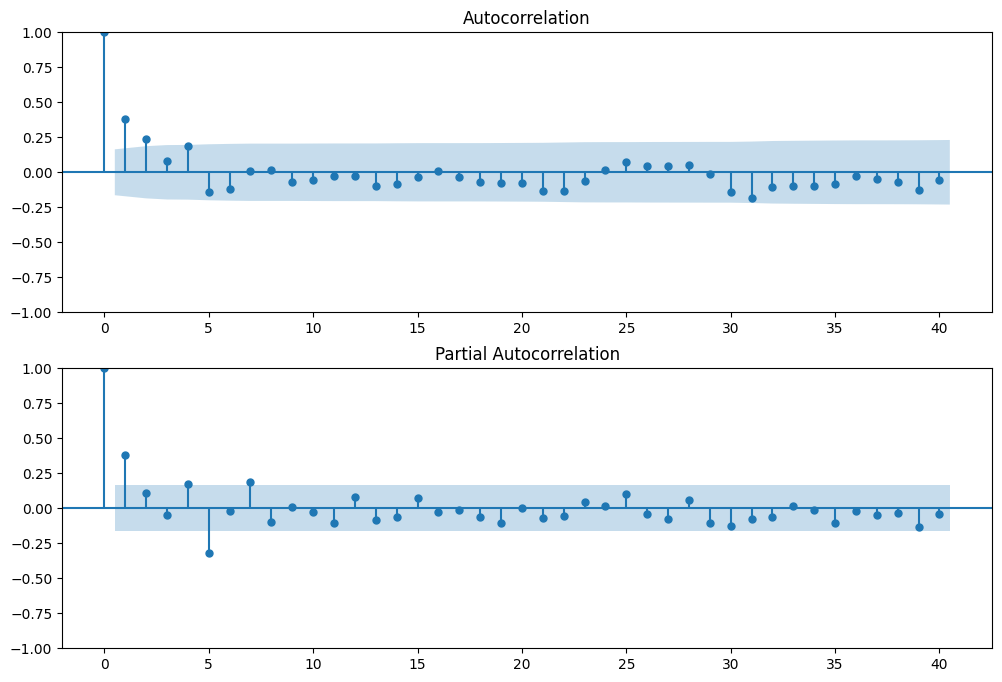

In [26]:
# Plotting the ACF as well as PACF graph for the following data
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plot_acf(store.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(store.dropna(),lags=40,ax=ax2)
plt.show()

In [27]:
# Implementing the SARIMAX model for the following data

model = SARIMAX(store['Weekly_Sales'],order=(2,0,2),seasonal_order=(1,0,0,52))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<Axes: xlabel='Date'>

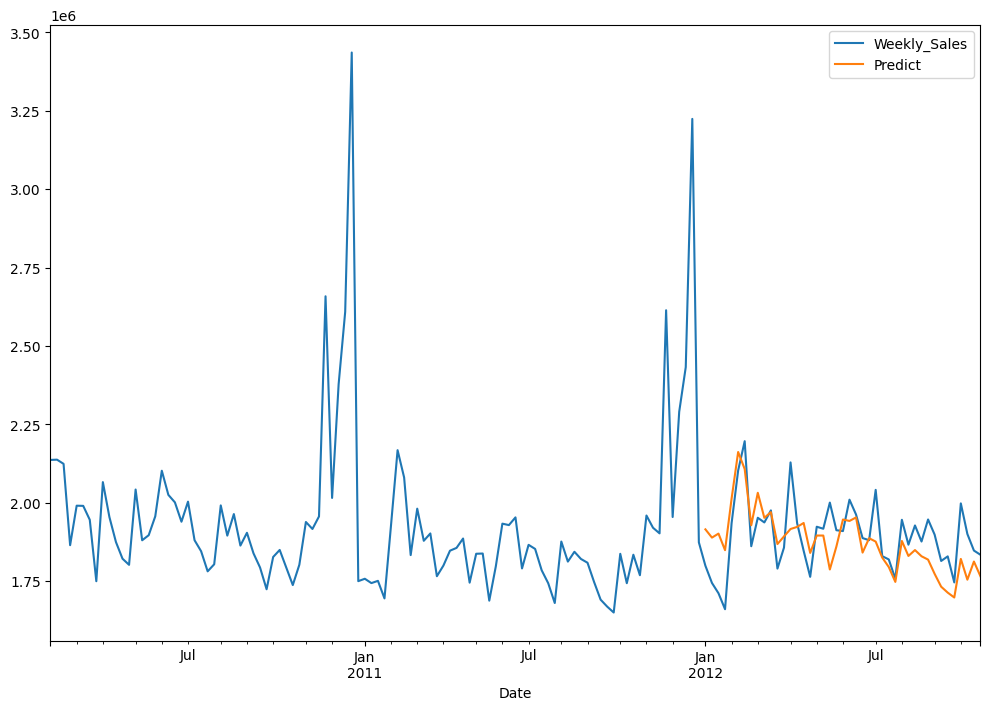

In [28]:
# Predicting the values of the SARIMAX model and plotting the graph

store['Predict'] = model.predict(start=100,end=142,dynamic=True)
store[['Weekly_Sales','Predict']].plot(figsize=(12,8))

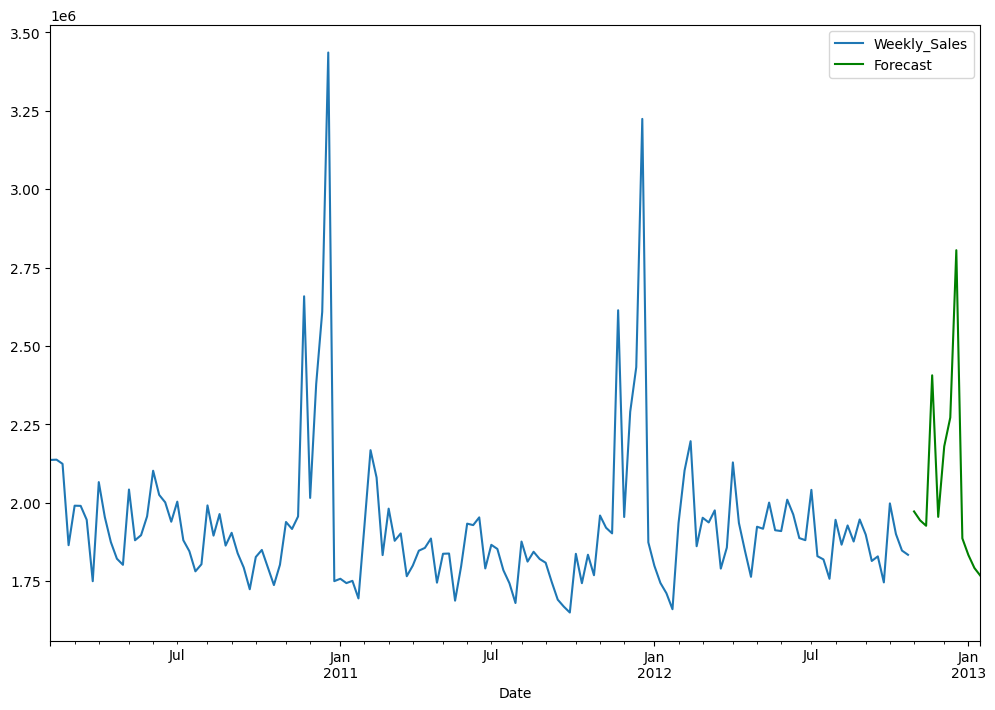

In [29]:
# Forecasting the values of SARIMAX model and plotting its graph

forecast = model.forecast(steps=12)
store['Weekly_Sales'].plot(figsize=(12, 8))
forecast.plot(label='Forecast', color='Green')
plt.legend(loc='best')

##### Store 8

In [30]:
# Extracting the data of Store 8 from the original dataset

store = mart[mart['Store']==8]
store.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,8,1004137.09,0,34.14,2.572,214.471451,6.299
2010-02-12,8,994801.40,1,33.34,2.548,214.621419,6.299
2010-02-19,8,963960.37,0,39.10,2.514,214.666488,6.299
2010-02-26,8,847592.11,0,37.91,2.561,214.694074,6.299
2010-03-05,8,881503.95,0,45.64,2.625,214.721659,6.299


In [31]:
store = store.loc[:,['Weekly_Sales']]
store

,Weekly_Sales
Date,
2010-02-05,1004137.09
2010-02-12,994801.40
2010-02-19,963960.37
2010-02-26,847592.11
2010-03-05,881503.95
...,...
2012-09-28,884724.41
2012-10-05,976436.02
2012-10-12,927511.99


In [32]:
# Plotting the weekly sales of store 8

fig = px.line(data_frame=store,x=store.index,y='Weekly_Sales',title="Weekly Sales of Store 8")
fig.update_traces(line=dict(color='blue'))
fig.show()

In [33]:
# Checking the stationarity of the data of Store 8
stationary_check(store)

Test Statistics                 -5.647653
p-value                          0.000001
Lags Used                        4.000000
Number of Observations used    138.000000
Critical Value(1%)              -3.478648
Critical Value(5%)              -2.882722
Critical Value(10%)             -2.578065
dtype: float64

As the p-value is less than 0.05 which proves that the graph of the data is stationary

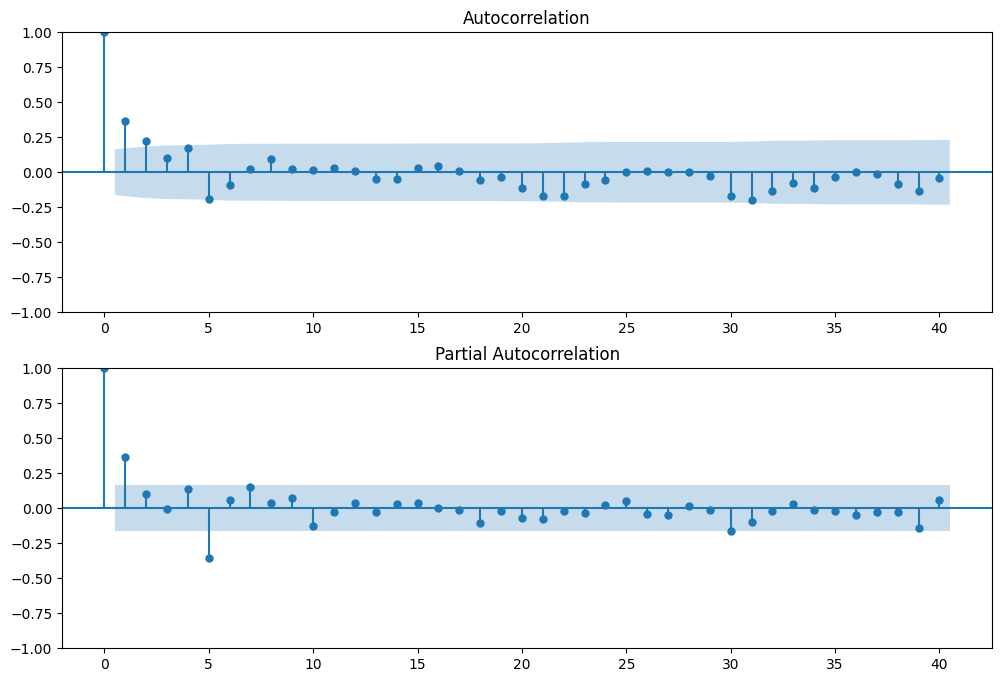

In [34]:
# Plotting the ACF as well as PACF graph for the following data
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plot_acf(store.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(store.dropna(),lags=40,ax=ax2)
plt.show()

In [35]:
# Implementing the SARIMAX model for the following data

model = SARIMAX(store['Weekly_Sales'],order=(2,0,2),seasonal_order=(1,0,0,52))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<Axes: xlabel='Date'>

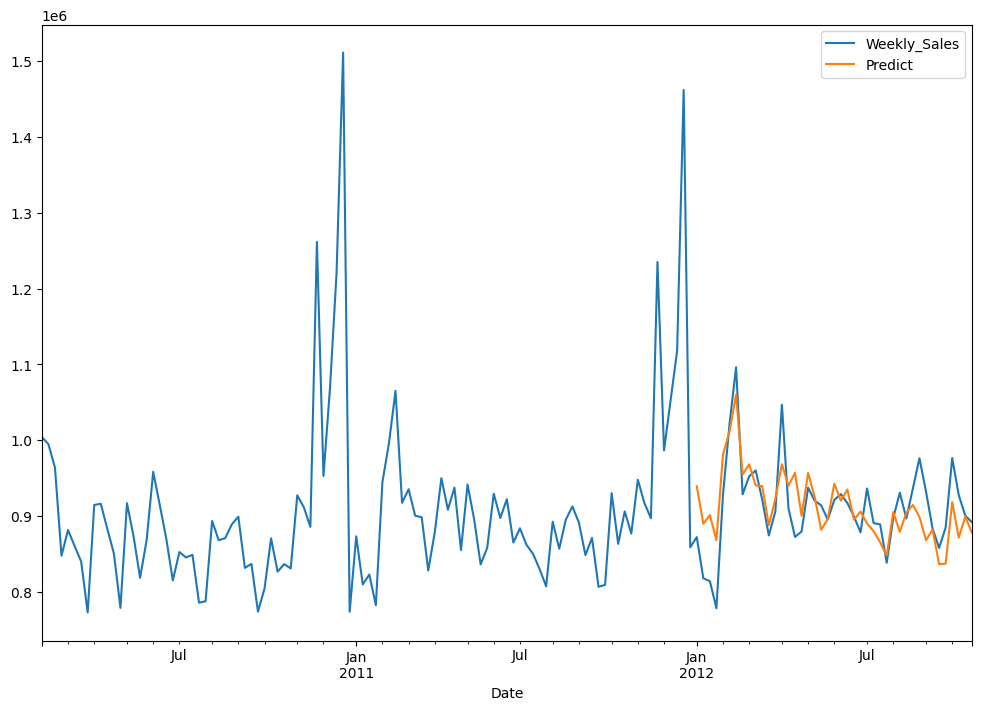

In [36]:
# Predicting the values of the SARIMAX model and plotting the graph

store['Predict'] = model.predict(start=100,end=142,dynamic=True)
store[['Weekly_Sales','Predict']].plot(figsize=(12,8))

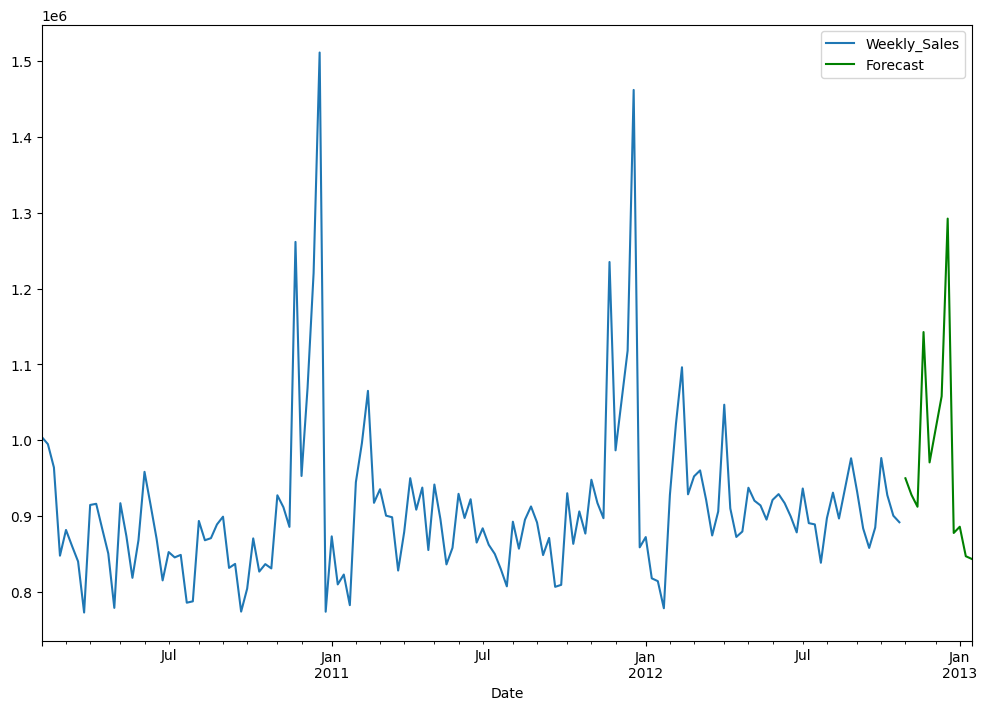

In [37]:
# Forecasting the values of SARIMAX model and plotting its graph

forecast = model.forecast(steps=12)
store['Weekly_Sales'].plot(figsize=(12, 8))
forecast.plot(label='Forecast', color='Green')
plt.legend(loc='best')

##### Store 13

In [38]:
# Extracting the data of Store 13 from the original dataset

store = mart[mart['Store']==13]
store.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,13,1967220.53,0,31.53,2.666,126.442065,8.316
2010-02-12,13,2030933.46,1,33.16,2.671,126.496258,8.316
2010-02-19,13,1970274.64,0,35.70,2.654,126.526286,8.316
2010-02-26,13,1817850.32,0,29.98,2.667,126.552286,8.316
2010-03-05,13,1939980.43,0,40.65,2.681,126.578286,8.316


In [39]:
store = store.loc[:,['Weekly_Sales']]
store

,Weekly_Sales
Date,
2010-02-05,1967220.53
2010-02-12,2030933.46
2010-02-19,1970274.64
2010-02-26,1817850.32
2010-03-05,1939980.43
...,...
2012-09-28,1927664.11
2012-10-05,2041918.74
2012-10-12,1999079.44


In [40]:
# Plotting the weekly sales of store 13

fig = px.line(data_frame=store,x=store.index,y='Weekly_Sales',title="Weekly Sales of Store 13")
fig.update_traces(line=dict(color='orange'))
fig.show()

In [41]:
# Checking the stationarity of the data of Store 13
stationary_check(store)

Test Statistics                 -5.502482
p-value                          0.000002
Lags Used                        4.000000
Number of Observations used    138.000000
Critical Value(1%)              -3.478648
Critical Value(5%)              -2.882722
Critical Value(10%)             -2.578065
dtype: float64

As the p-value is less than 0.05 which proves that the graph of the data is stationary

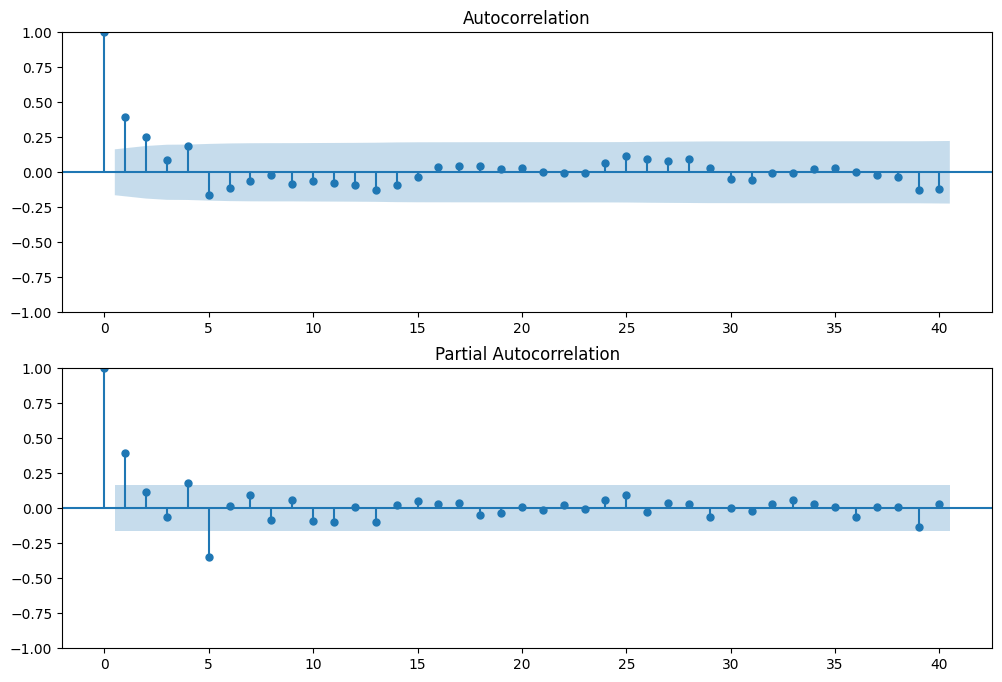

In [42]:
# Plotting the ACF as well as PACF graph for the following data
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plot_acf(store.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(store.dropna(),lags=40,ax=ax2)
plt.show()

In [43]:
# Implementing the SARIMAX model for the following data

model = SARIMAX(store['Weekly_Sales'],order=(2,0,2),seasonal_order=(1,0,0,52))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<Axes: xlabel='Date'>

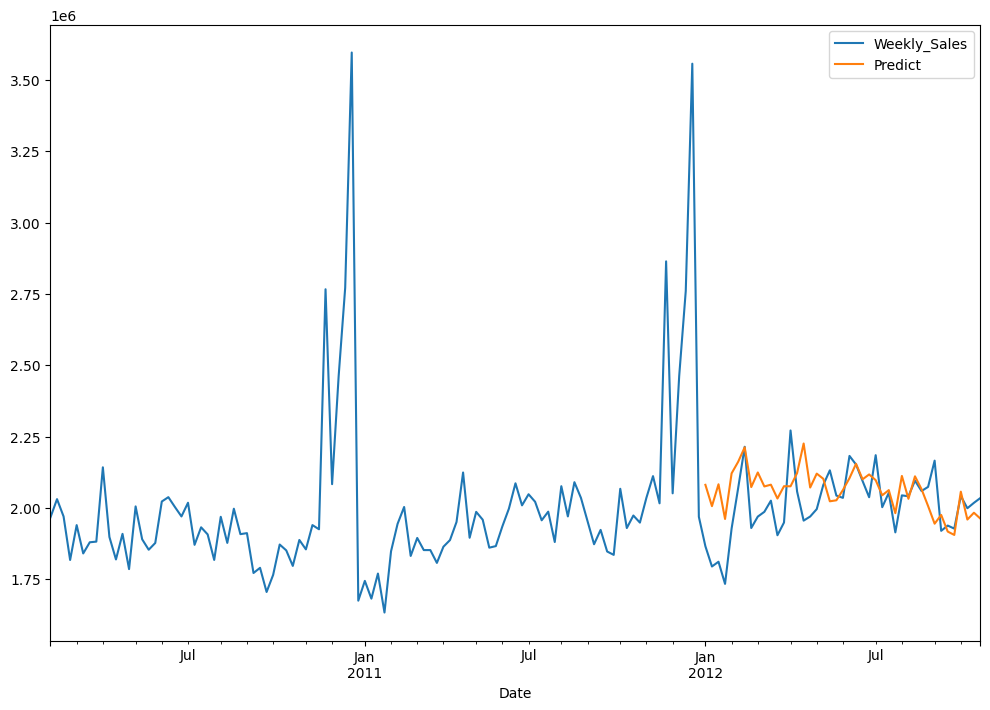

In [44]:
# Predicting the values of the SARIMAX model and plotting the graph

store['Predict'] = model.predict(start=100,end=142,dynamic=True)
store[['Weekly_Sales','Predict']].plot(figsize=(12,8))

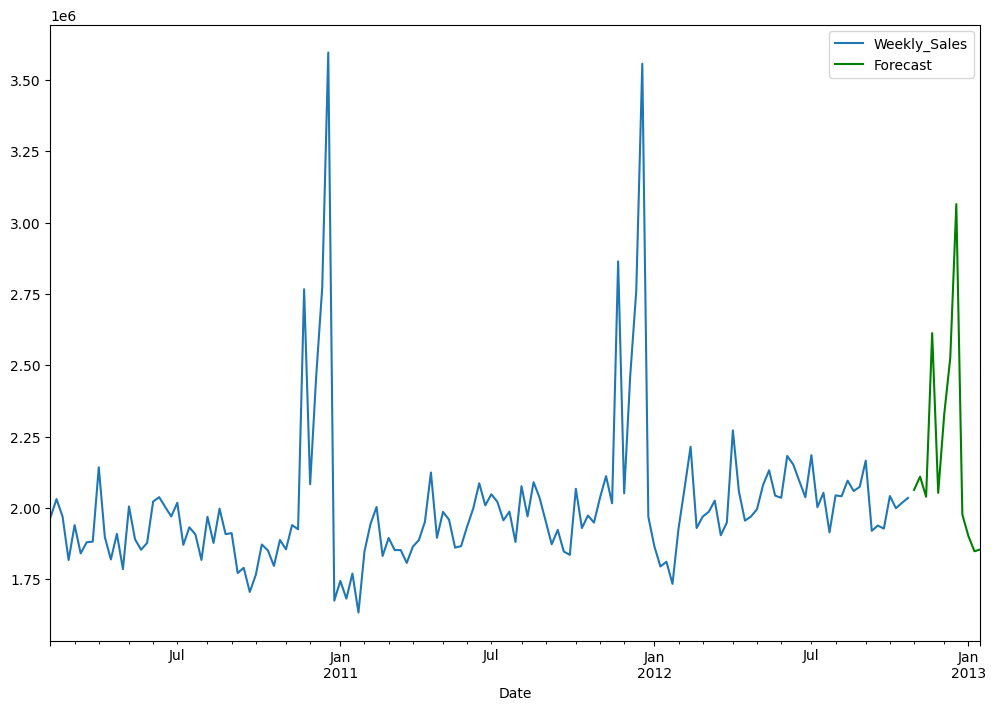

In [45]:
# Forecasting the values of SARIMAX model and plotting its graph

forecast = model.forecast(steps=12)
store['Weekly_Sales'].plot(figsize=(12, 8))
forecast.plot(label='Forecast', color='Green')
plt.legend(loc='best')

##### Store 19

In [46]:
# Extracting the data of Store 19 from the original dataset

store = mart[mart['Store']==19]
store.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,19,1507637.17,0,20.96,2.954,131.527903,8.35
2010-02-12,19,1536549.95,1,23.22,2.940,131.586613,8.35
2010-02-19,19,1515976.11,0,28.57,2.909,131.637000,8.35
2010-02-26,19,1373270.06,0,30.33,2.910,131.686000,8.35
2010-03-05,19,1495844.57,0,32.92,2.919,131.735000,8.35


In [47]:
store = store.loc[:,['Weekly_Sales']]
store

,Weekly_Sales
Date,
2010-02-05,1507637.17
2010-02-12,1536549.95
2010-02-19,1515976.11
2010-02-26,1373270.06
2010-03-05,1495844.57
...,...
2012-09-28,1338299.02
2012-10-05,1408016.10
2012-10-12,1352809.50


In [48]:
# Plotting the weekly sales of store 19

fig = px.line(data_frame=store,x=store.index,y='Weekly_Sales',title="Weekly Sales of Store 19")
fig.update_traces(line=dict(color='green'))
fig.show()

In [49]:
# Checking the stationarity of the data of Store 19
stationary_check(store)

Test Statistics                 -5.618164
p-value                          0.000001
Lags Used                        4.000000
Number of Observations used    138.000000
Critical Value(1%)              -3.478648
Critical Value(5%)              -2.882722
Critical Value(10%)             -2.578065
dtype: float64

As the p-value is less than 0.05 which proves that the graph of the data is stationary

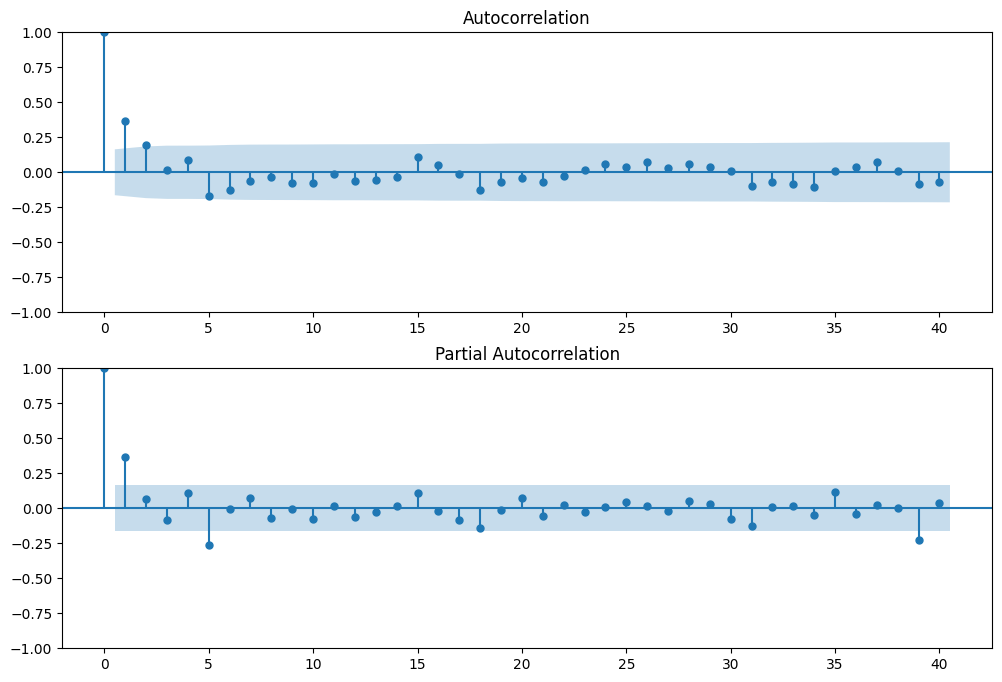

In [50]:
# Plotting the ACF as well as PACF graph for the following data
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plot_acf(store.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(store.dropna(),lags=40,ax=ax2)
plt.show()

In [51]:
# Implementing the SARIMAX model for the following data

model = SARIMAX(store['Weekly_Sales'],order=(2,0,2),seasonal_order=(1,0,0,52))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<Axes: xlabel='Date'>

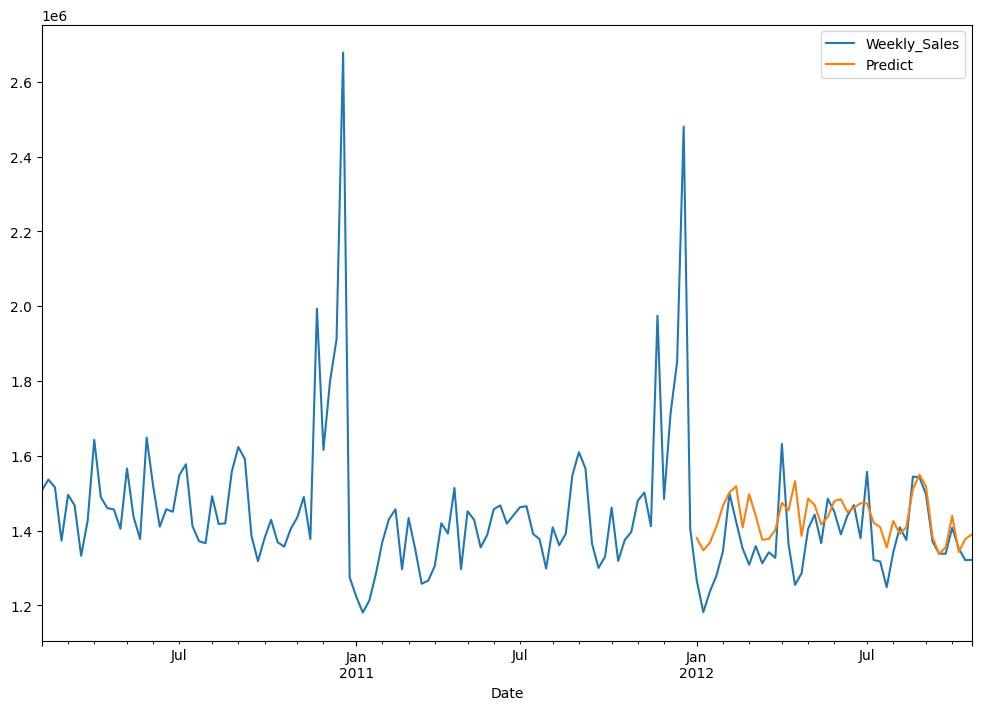

In [52]:
# Predicting the values of the SARIMAX model and plotting the graph

store['Predict'] = model.predict(start=100,end=142,dynamic=True)
store[['Weekly_Sales','Predict']].plot(figsize=(12,8))

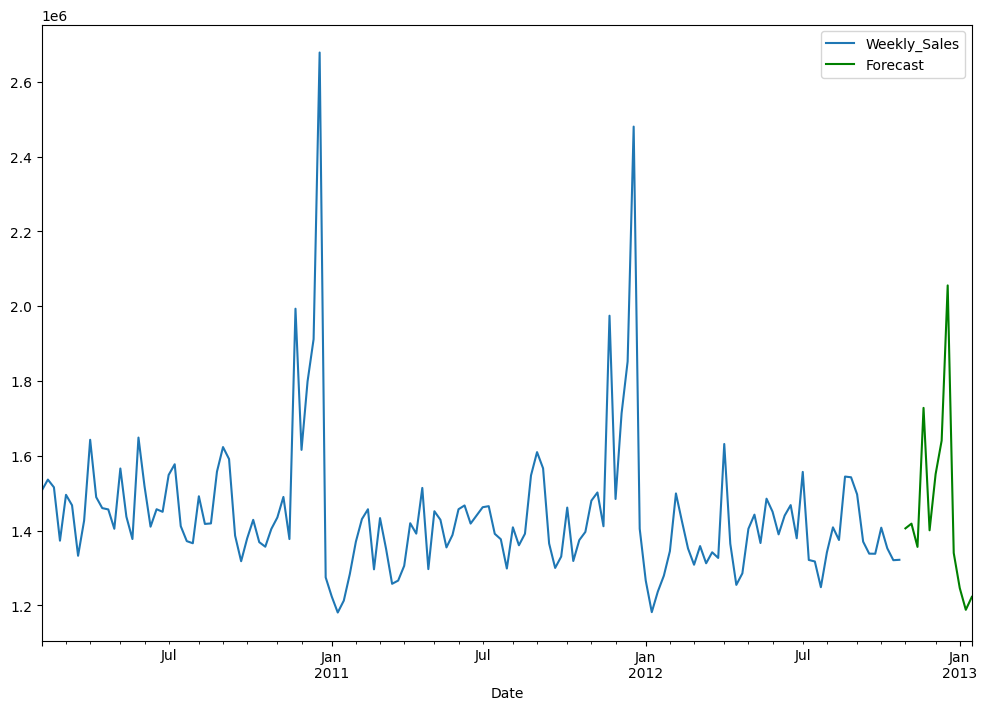

In [53]:
# Forecasting the values of SARIMAX model and plotting its graph

forecast = model.forecast(steps=12)
store['Weekly_Sales'].plot(figsize=(12, 8))
forecast.plot(label='Forecast', color='Green')
plt.legend(loc='best')

##### Store 22

In [54]:
# Extracting the data of Store 22 from the original dataset

store = mart[mart['Store']==22]
store.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,22,1033017.37,0,24.36,2.788,135.352461,8.283
2010-02-12,22,1022571.25,1,28.14,2.771,135.411308,8.283
2010-02-19,22,988467.61,0,31.96,2.747,135.465778,8.283
2010-02-26,22,899761.48,0,35.98,2.753,135.519519,8.283
2010-03-05,22,1009201.24,0,36.82,2.766,135.573260,8.283


In [55]:
store = store.loc[:,['Weekly_Sales']]
store

,Weekly_Sales
Date,
2010-02-05,1033017.37
2010-02-12,1022571.25
2010-02-19,988467.61
2010-02-26,899761.48
2010-03-05,1009201.24
...,...
2012-09-28,976479.51
2012-10-05,1009887.36
2012-10-12,1004039.84


In [56]:
# Plotting the weekly sales of store 22

fig = px.line(data_frame=store,x=store.index,y='Weekly_Sales',title="Weekly Sales of Store 22")
fig.update_traces(line=dict(color='purple'))
fig.show()

In [57]:
# Checking the stationarity of the data of Store 22
stationary_check(store)

Test Statistics               -6.138139e+00
p-value                        8.092842e-08
Lags Used                      4.000000e+00
Number of Observations used    1.380000e+02
Critical Value(1%)            -3.478648e+00
Critical Value(5%)            -2.882722e+00
Critical Value(10%)           -2.578065e+00
dtype: float64

As the p-value is less than 0.05 which proves that the graph of the data is stationary

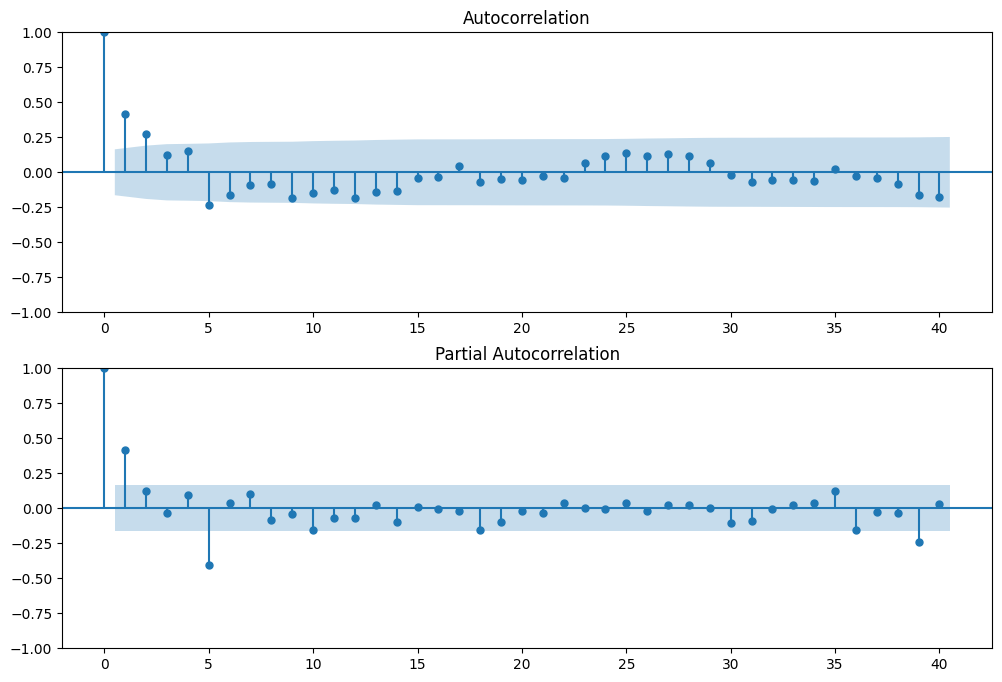

In [58]:
# Plotting the ACF as well as PACF graph for the following data
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plot_acf(store.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(store.dropna(),lags=40,ax=ax2)
plt.show()

In [59]:
# Implementing the SARIMAX model for the following data

model = SARIMAX(store['Weekly_Sales'],order=(2,0,2),seasonal_order=(1,0,0,52))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<Axes: xlabel='Date'>

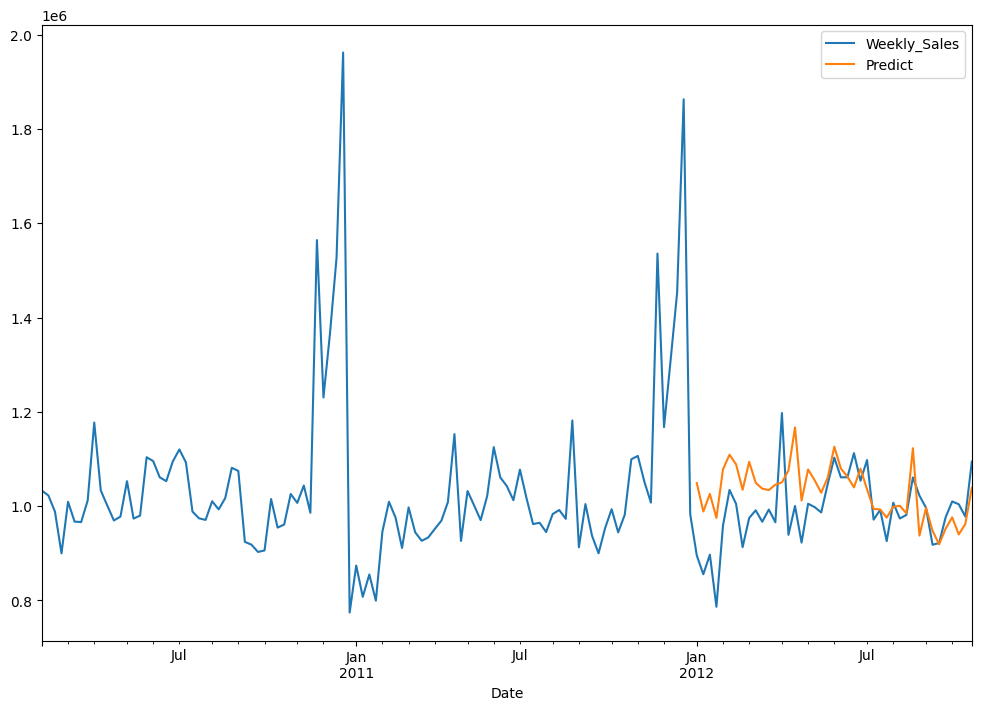

In [60]:
# Predicting the values of the SARIMAX model and plotting the graph

store['Predict'] = model.predict(start=100,end=142,dynamic=True)
store[['Weekly_Sales','Predict']].plot(figsize=(12,8))

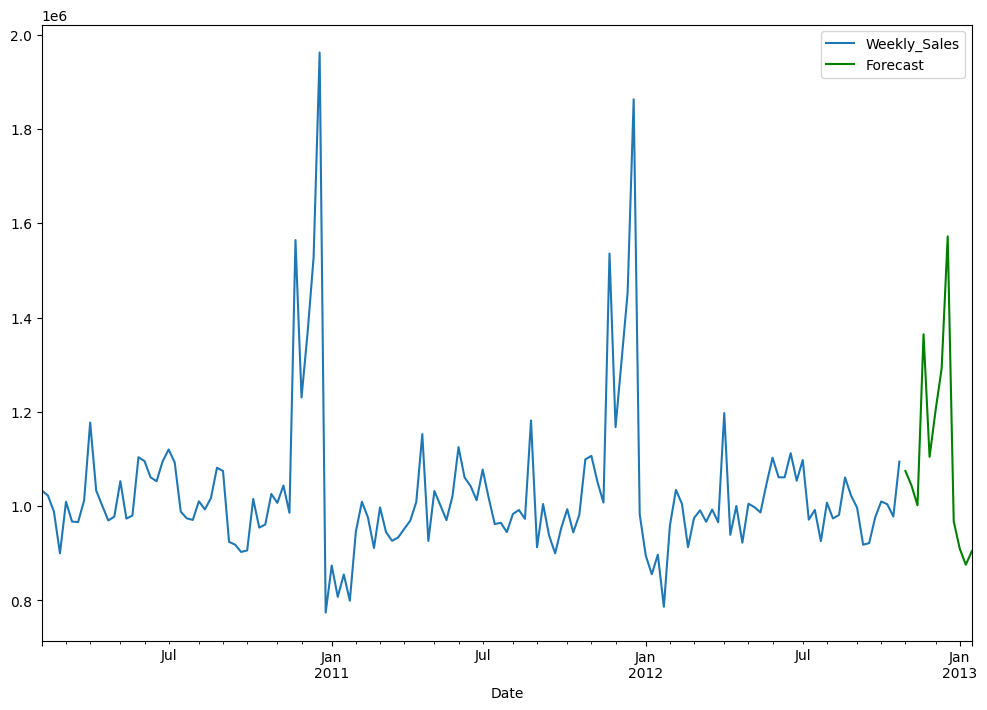

In [61]:
# Forecasting the values of SARIMAX model and plotting its graph

forecast = model.forecast(steps=12)
store['Weekly_Sales'].plot(figsize=(12, 8))
forecast.plot(label='Forecast', color='Green')
plt.legend(loc='best')

##### Store 26

In [62]:
# Extracting the data of Store 26 from the original dataset

store = mart[mart['Store']==26]
store.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,26,1034119.21,0,9.55,2.788,131.527903,8.488
2010-02-12,26,1015684.09,1,18.14,2.771,131.586613,8.488
2010-02-19,26,999348.55,0,22.62,2.747,131.637000,8.488
2010-02-26,26,855385.01,0,27.32,2.753,131.686000,8.488
2010-03-05,26,1005669.58,0,28.60,2.766,131.735000,8.488


In [63]:
store = store.loc[:,['Weekly_Sales']]
store

,Weekly_Sales
Date,
2010-02-05,1034119.21
2010-02-12,1015684.09
2010-02-19,999348.55
2010-02-26,855385.01
2010-03-05,1005669.58
...,...
2012-09-28,964726.37
2012-10-05,1095504.26
2012-10-12,1044639.69


In [64]:
# Plotting the weekly sales of store 26

fig = px.line(data_frame=store,x=store.index,y='Weekly_Sales',title="Weekly Sales of Store 26")
fig.update_traces(line=dict(color='red'))
fig.show()

In [65]:
# Checking the stationarity of the data of Store 26
stationary_check(store)

Test Statistics                 -4.899731
p-value                          0.000035
Lags Used                        4.000000
Number of Observations used    138.000000
Critical Value(1%)              -3.478648
Critical Value(5%)              -2.882722
Critical Value(10%)             -2.578065
dtype: float64

As the p-value is less than 0.05 which proves that the graph of the data is stationary

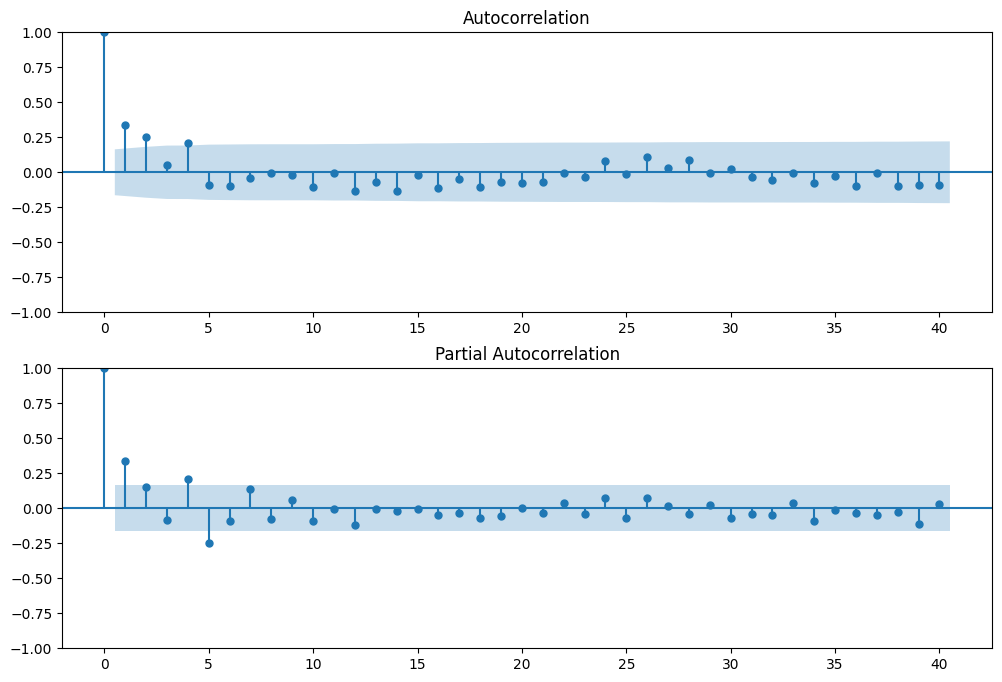

In [66]:
# Plotting the ACF as well as PACF graph for the following data
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plot_acf(store.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(store.dropna(),lags=40,ax=ax2)
plt.show()

In [67]:
# Implementing the SARIMAX model for the following data

model = SARIMAX(store['Weekly_Sales'],order=(2,0,2),seasonal_order=(1,0,0,52))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<Axes: xlabel='Date'>

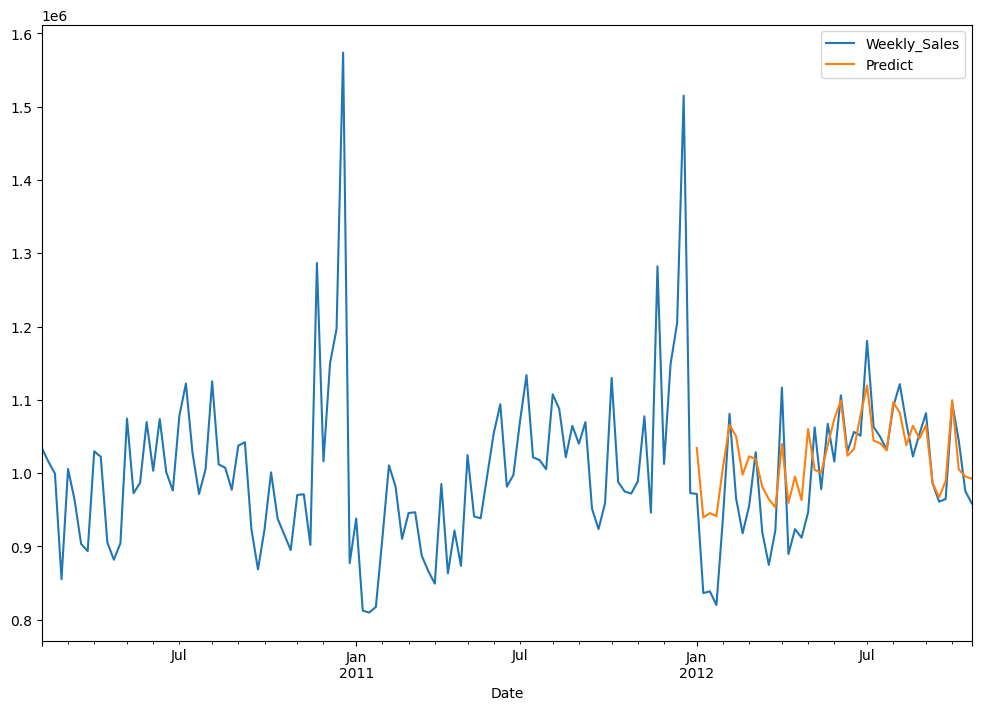

In [68]:
# Predicting the values of the SARIMAX model and plotting the graph

store['Predict'] = model.predict(start=100,end=142,dynamic=True)
store[['Weekly_Sales','Predict']].plot(figsize=(12,8))

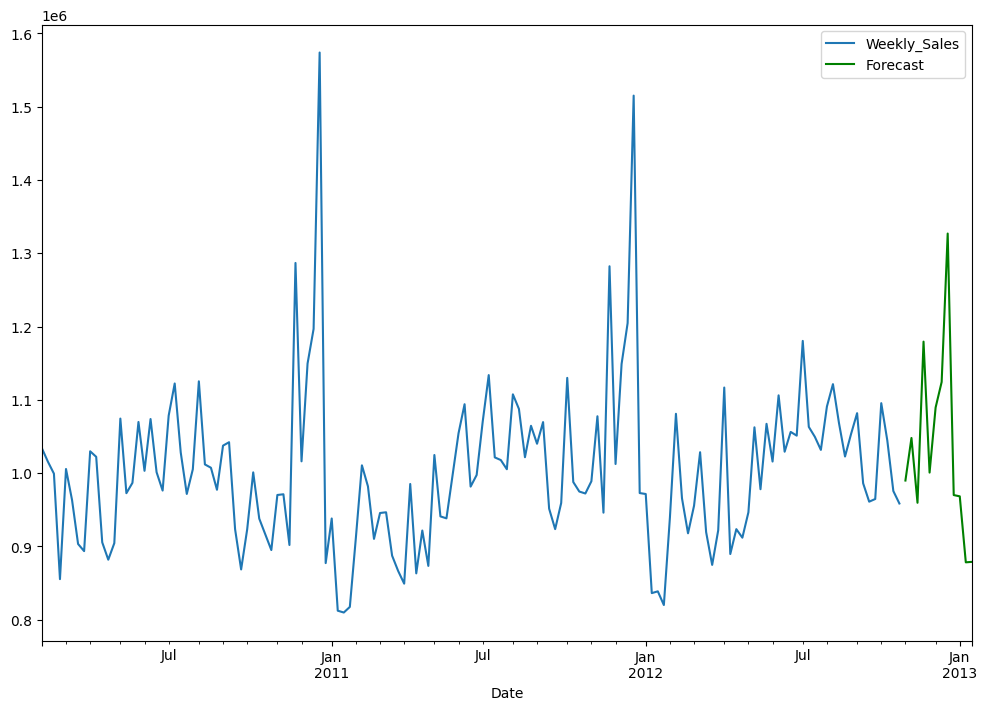

In [69]:
# Forecasting the values of SARIMAX model and plotting its graph

forecast = model.forecast(steps=12)
store['Weekly_Sales'].plot(figsize=(12, 8))
forecast.plot(label='Forecast', color='Green')
plt.legend(loc='best')

##### Store 34

In [70]:
# Extracting the data of Store 34 from the original dataset

store = mart[mart['Store']==34]
store.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,34,956228.96,0,35.44,2.598,126.442065,9.521
2010-02-12,34,994610.99,1,36.13,2.573,126.496258,9.521
2010-02-19,34,983963.07,0,38.36,2.540,126.526286,9.521
2010-02-26,34,905756.13,0,37.28,2.590,126.552286,9.521
2010-03-05,34,918295.79,0,42.65,2.654,126.578286,9.521


In [71]:
store = store.loc[:,['Weekly_Sales']]
store

,Weekly_Sales
Date,
2010-02-05,956228.96
2010-02-12,994610.99
2010-02-19,983963.07
2010-02-26,905756.13
2010-03-05,918295.79
...,...
2012-09-28,928629.31
2012-10-05,968896.68
2012-10-12,948613.39


In [72]:
# Plotting the weekly sales of store 34

fig = px.line(data_frame=store,x=store.index,y='Weekly_Sales',title="Weekly Sales of Store 34")
fig.update_traces(line=dict(color='blue'))
fig.show()

In [73]:
# Checking the stationarity of the data of Store 34
stationary_check(store)

Test Statistics                 -4.765122
p-value                          0.000063
Lags Used                        4.000000
Number of Observations used    138.000000
Critical Value(1%)              -3.478648
Critical Value(5%)              -2.882722
Critical Value(10%)             -2.578065
dtype: float64

As the p-value is less than 0.05 which proves that the graph of the data is stationary

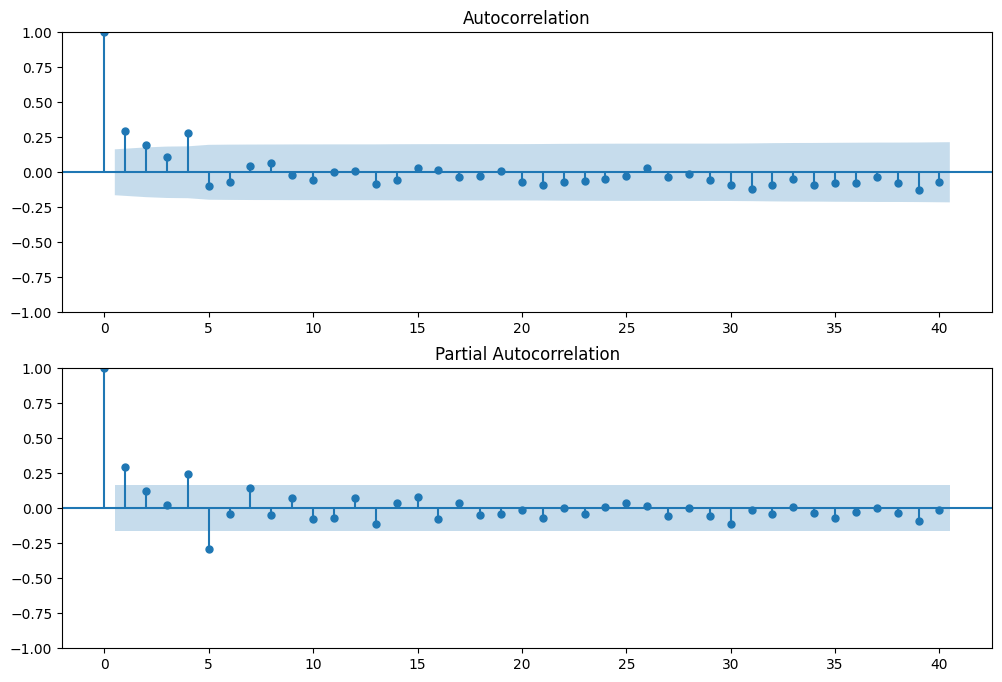

In [74]:
# Plotting the ACF as well as PACF graph for the following data
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plot_acf(store.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(store.dropna(),lags=40,ax=ax2)
plt.show()

In [75]:
# Implementing the SARIMAX model for the following data

model = SARIMAX(store['Weekly_Sales'],order=(2,0,2),seasonal_order=(1,0,0,52))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<Axes: xlabel='Date'>

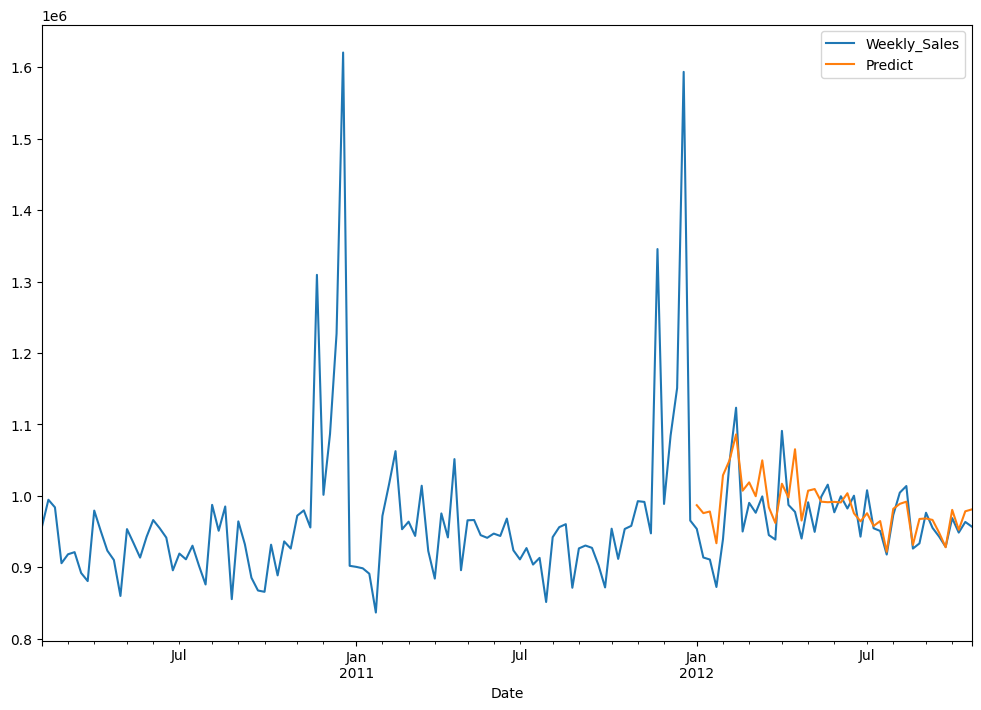

In [76]:
# Predicting the values of the SARIMAX model and plotting the graph

store['Predict'] = model.predict(start=100,end=142,dynamic=True)
store[['Weekly_Sales','Predict']].plot(figsize=(12,8))

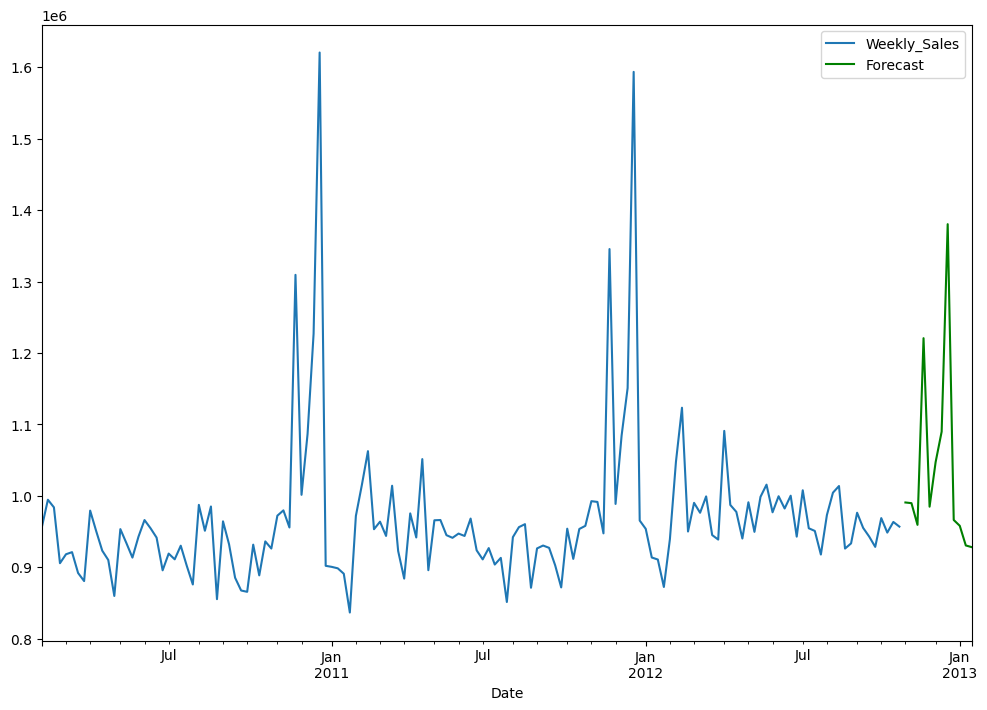

In [77]:
# Forecasting the values of SARIMAX model and plotting its graph

forecast = model.forecast(steps=12)
store['Weekly_Sales'].plot(figsize=(12, 8))
forecast.plot(label='Forecast', color='Green')
plt.legend(loc='best')

##### Store 39

In [78]:
# Extracting the data of Store 39 from the original dataset

store = mart[mart['Store']==39]
store.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,39,1230596.80,0,44.30,2.572,209.852966,8.554
2010-02-12,39,1266229.07,1,44.58,2.548,209.997021,8.554
2010-02-19,39,1230591.97,0,43.96,2.514,210.045102,8.554
2010-02-26,39,1168582.02,0,49.79,2.561,210.077189,8.554
2010-03-05,39,1266254.21,0,50.93,2.625,210.109275,8.554


In [79]:
store = store.loc[:,['Weekly_Sales']]
store

,Weekly_Sales
Date,
2010-02-05,1230596.80
2010-02-12,1266229.07
2010-02-19,1230591.97
2010-02-26,1168582.02
2010-03-05,1266254.21
...,...
2012-09-28,1495607.07
2012-10-05,1574408.67
2012-10-12,1494417.07


In [80]:
# Plotting the weekly sales of store 39

fig = px.line(data_frame=store,x=store.index,y='Weekly_Sales',title="Weekly Sales of Store 39")
fig.update_traces(line=dict(color='orange'))
fig.show()

In [81]:
# Checking the stationarity of the data of Store 39
stationary_check(store)

Test Statistics                 -4.281374
p-value                          0.000478
Lags Used                        4.000000
Number of Observations used    138.000000
Critical Value(1%)              -3.478648
Critical Value(5%)              -2.882722
Critical Value(10%)             -2.578065
dtype: float64

As the p-value is less than 0.05 which proves that the graph of the data is stationary

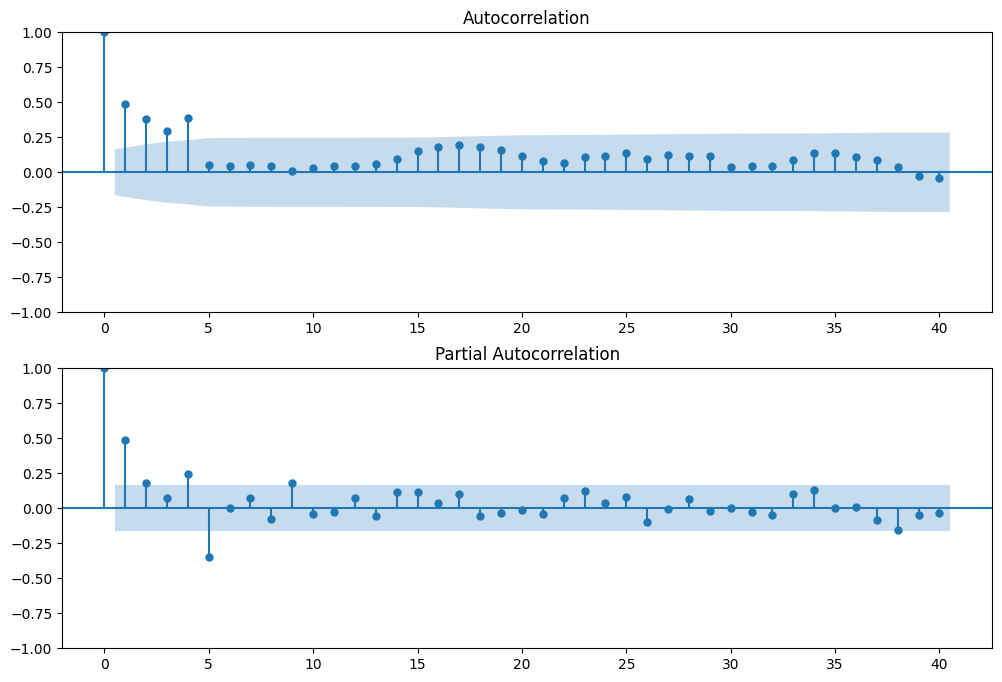

In [82]:
# Plotting the ACF as well as PACF graph for the following data
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plot_acf(store.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(store.dropna(),lags=40,ax=ax2)
plt.show()

In [83]:
# Implementing the SARIMAX model for the following data

model = SARIMAX(store['Weekly_Sales'],order=(2,0,2),seasonal_order=(1,0,0,52))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<Axes: xlabel='Date'>

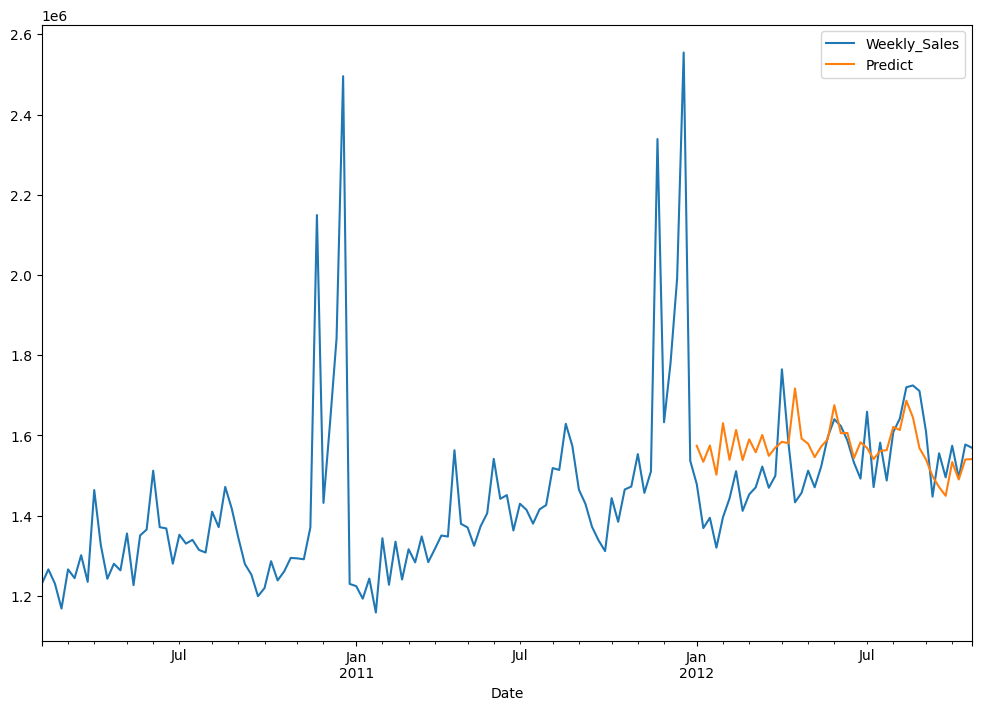

In [84]:
# Predicting the values of the SARIMAX model and plotting the graph

store['Predict'] = model.predict(start=100,end=142,dynamic=True)
store[['Weekly_Sales','Predict']].plot(figsize=(12,8))

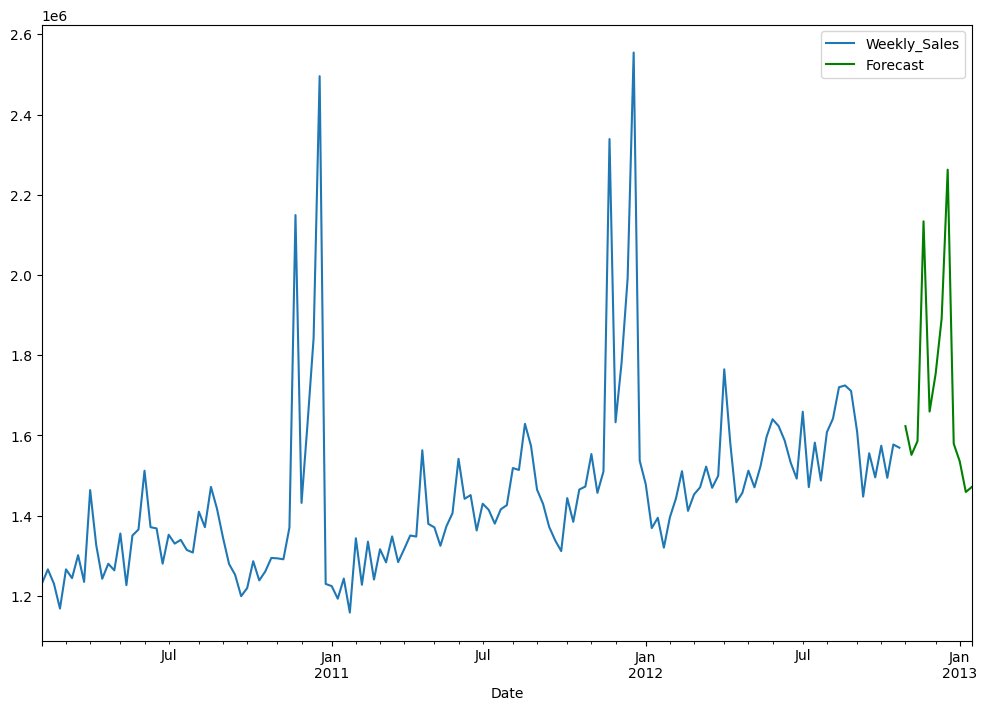

In [85]:
# Forecasting the values of SARIMAX model and plotting its graph

forecast = model.forecast(steps=12)
store['Weekly_Sales'].plot(figsize=(12, 8))
forecast.plot(label='Forecast', color='Green')
plt.legend(loc='best')

##### Store 41

In [86]:
# Extracting the data of Store 41 from the original dataset

store = mart[mart['Store']==41]
store.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,41,1086533.18,0,30.27,2.580,189.381697,7.541
2010-02-12,41,1075656.34,1,23.04,2.572,189.464272,7.541
2010-02-19,41,1052034.74,0,24.13,2.550,189.534100,7.541
2010-02-26,41,991941.73,0,21.84,2.586,189.601802,7.541
2010-03-05,41,1063557.49,0,32.49,2.620,189.669505,7.541


In [87]:
store = store.loc[:,['Weekly_Sales']]
store

,Weekly_Sales
Date,
2010-02-05,1086533.18
2010-02-12,1075656.34
2010-02-19,1052034.74
2010-02-26,991941.73
2010-03-05,1063557.49
...,...
2012-09-28,1307928.01
2012-10-05,1400160.95
2012-10-12,1409544.97


In [88]:
# Plotting the weekly sales of store 41

fig = px.line(data_frame=store,x=store.index,y='Weekly_Sales',title="Weekly Sales of Store 41")
fig.update_traces(line=dict(color='green'))
fig.show()

In [89]:
# Checking the stationarity of the data of Store 41
stationary_check(store)

Test Statistics                 -4.488249
p-value                          0.000206
Lags Used                        4.000000
Number of Observations used    138.000000
Critical Value(1%)              -3.478648
Critical Value(5%)              -2.882722
Critical Value(10%)             -2.578065
dtype: float64

As the p-value is less than 0.05 which proves that the graph of the data is stationary

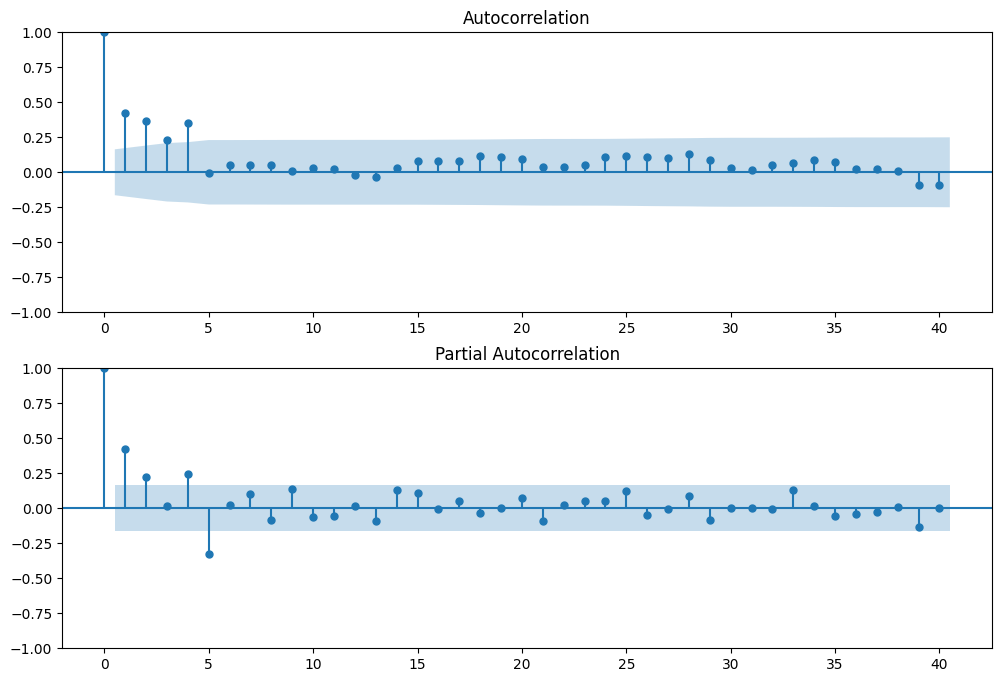

In [90]:
# Plotting the ACF as well as PACF graph for the following data
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plot_acf(store.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(store.dropna(),lags=40,ax=ax2)
plt.show()

In [91]:
# Implementing the SARIMAX model for the following data

model = SARIMAX(store['Weekly_Sales'],order=(2,0,2),seasonal_order=(1,0,0,52))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<Axes: xlabel='Date'>

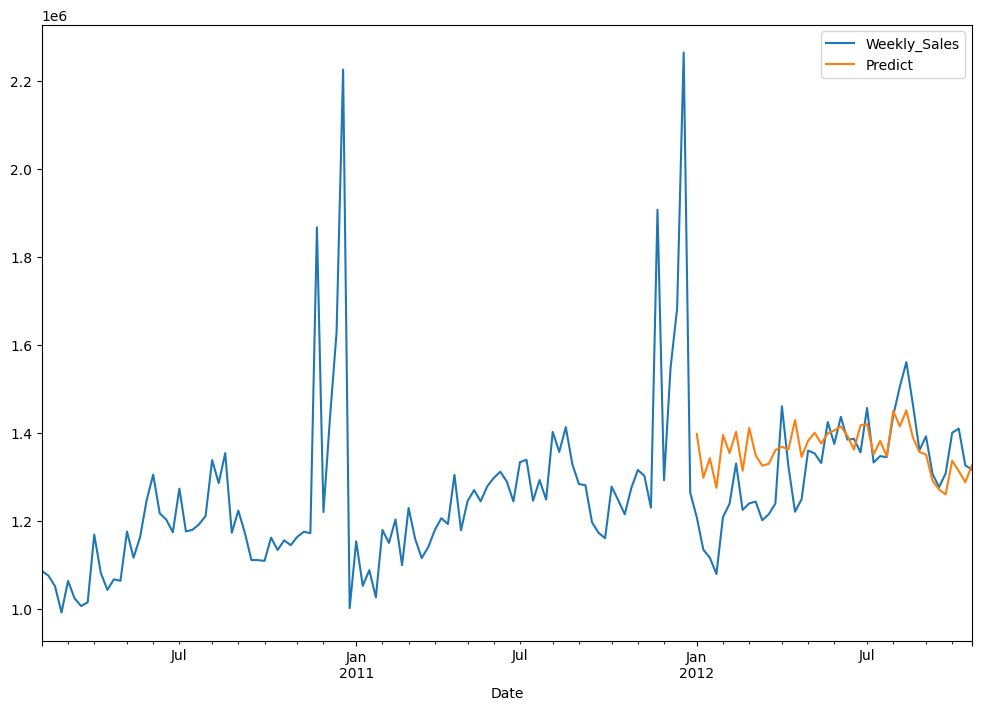

In [92]:
# Predicting the values of the SARIMAX model and plotting the graph

store['Predict'] = model.predict(start=100,end=142,dynamic=True)
store[['Weekly_Sales','Predict']].plot(figsize=(12,8))

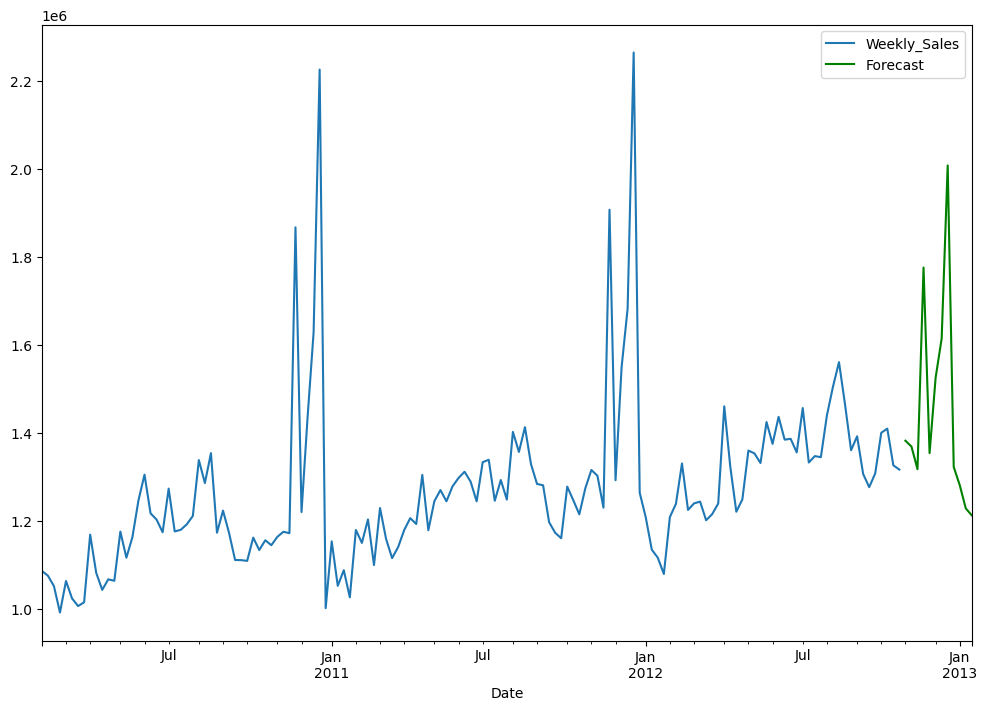

In [93]:
# Forecasting the values of SARIMAX model and plotting its graph

forecast = model.forecast(steps=12)
store['Weekly_Sales'].plot(figsize=(12, 8))
forecast.plot(label='Forecast', color='Green')
plt.legend(loc='best')

##### Store 45

In [94]:
# Extracting the data of Store 45 from the original dataset

store = mart[mart['Store']==45]
store.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,45,890689.51,0,27.31,2.784,181.871190,8.992
2010-02-12,45,656988.64,1,27.73,2.773,181.982317,8.992
2010-02-19,45,841264.04,0,31.27,2.745,182.034782,8.992
2010-02-26,45,741891.65,0,34.89,2.754,182.077469,8.992
2010-03-05,45,777951.22,0,37.13,2.777,182.120157,8.992


In [95]:
store = store.loc[:,['Weekly_Sales']]
store

,Weekly_Sales
Date,
2010-02-05,890689.51
2010-02-12,656988.64
2010-02-19,841264.04
2010-02-26,741891.65
2010-03-05,777951.22
...,...
2012-09-28,713173.95
2012-10-05,733455.07
2012-10-12,734464.36


In [96]:
# Plotting the weekly sales of store 45

fig = px.line(data_frame=store,x=store.index,y='Weekly_Sales',title="Weekly Sales of Store 45")
fig.update_traces(line=dict(color='purple'))
fig.show()

In [97]:
# Checking the stationarity of the data of Store 45
stationary_check(store)

Test Statistics                 -5.572899
p-value                          0.000001
Lags Used                        4.000000
Number of Observations used    138.000000
Critical Value(1%)              -3.478648
Critical Value(5%)              -2.882722
Critical Value(10%)             -2.578065
dtype: float64

As the p-value is less than 0.05 which proves that the graph of the data is stationary

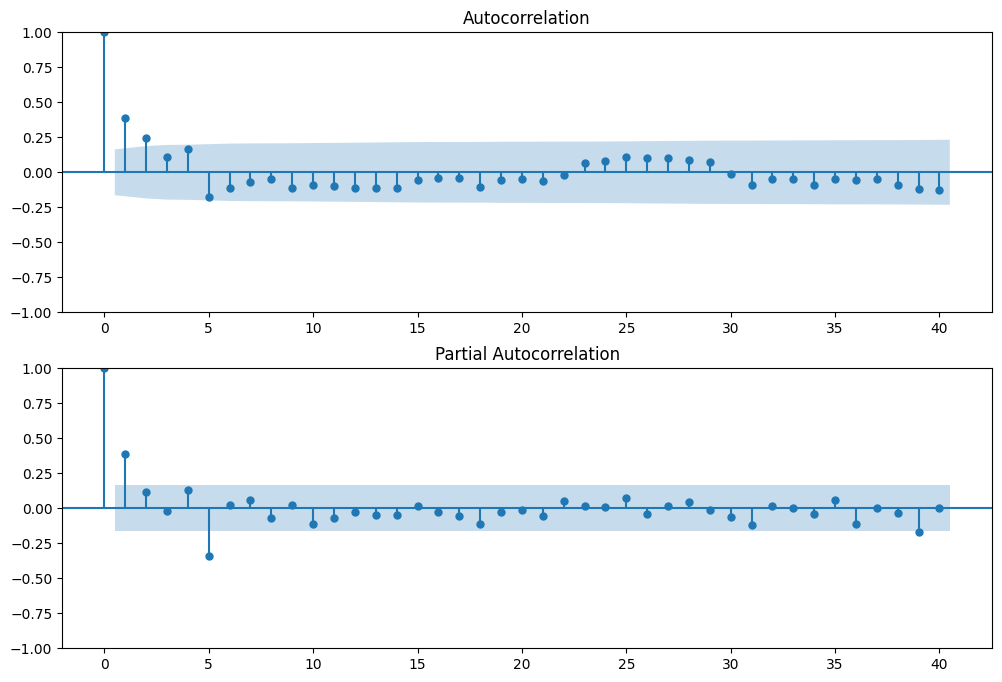

In [98]:
# Plotting the ACF as well as PACF graph for the following data
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plot_acf(store.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(store.dropna(),lags=40,ax=ax2)
plt.show()

In [99]:
# Implementing the SARIMAX model for the following data

model = SARIMAX(store['Weekly_Sales'],order=(2,0,2),seasonal_order=(1,0,0,52))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<Axes: xlabel='Date'>

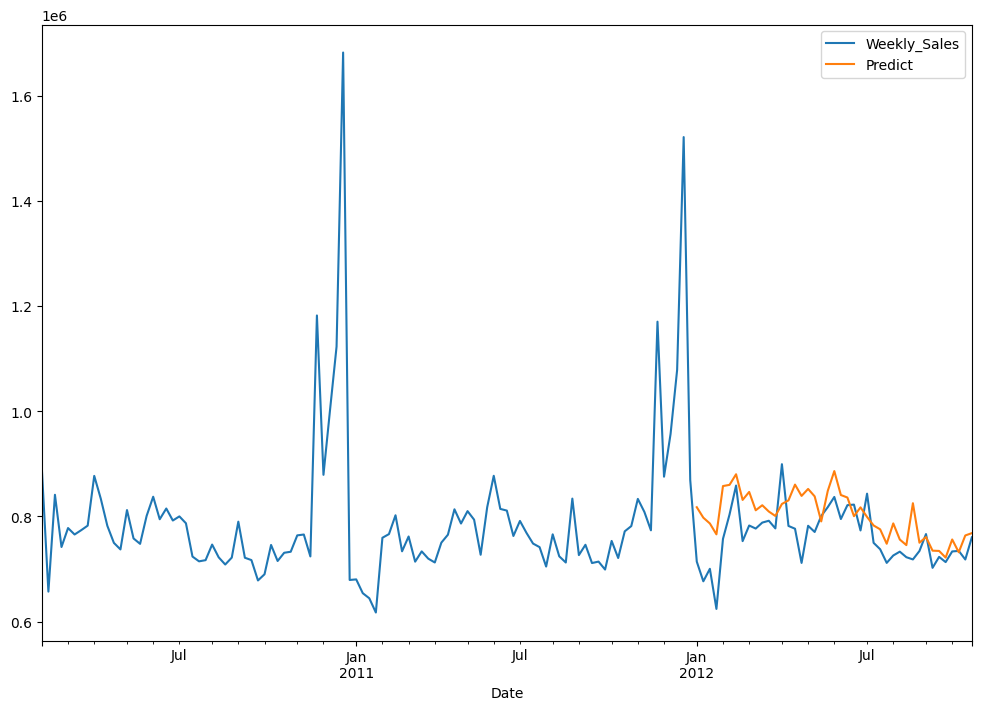

In [100]:
# Predicting the values of the SARIMAX model and plotting the graph

store['Predict'] = model.predict(start=100,end=142,dynamic=True)
store[['Weekly_Sales','Predict']].plot(figsize=(12,8))

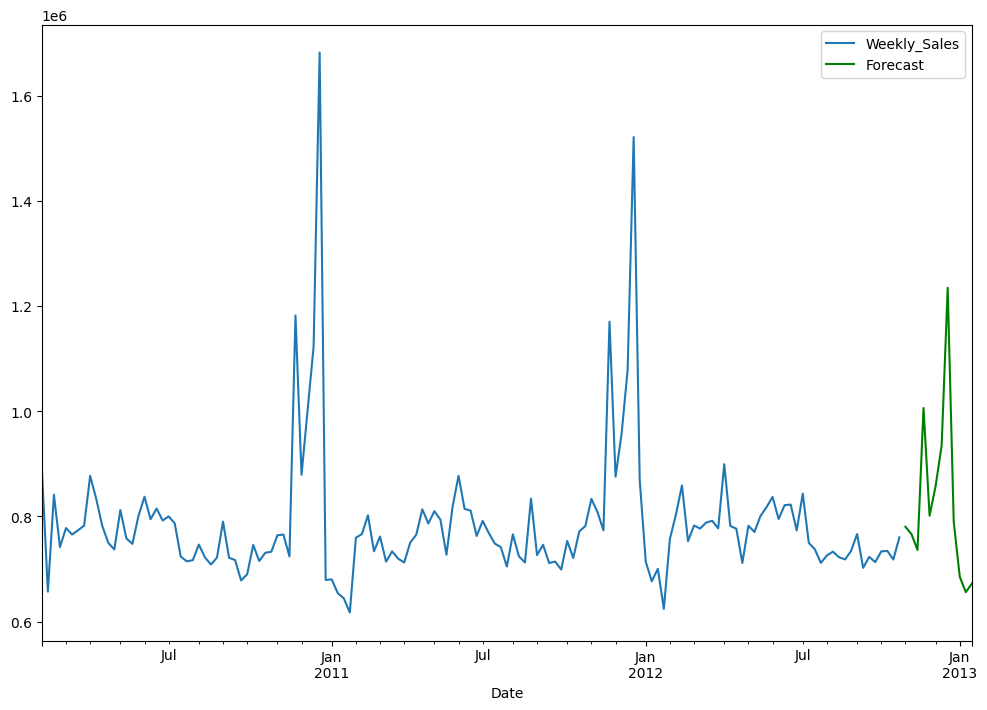

In [101]:
# Forecasting the values of SARIMAX model and plotting its graph

forecast = model.forecast(steps=12)
store['Weekly_Sales'].plot(figsize=(12, 8))
forecast.plot(label='Forecast', color='Green')
plt.legend(loc='best')

#### Conclusion :
* From the above graphs, we can observe the overall weekly sales of each store
* From the above time series graphs, we can observe the weekly sales of each individual store
* From the above observations,we can forecast the weekly sales for next 12 weeks of 10 random stores